<a href="https://colab.research.google.com/github/Raviande/Capston-project--2-seoul-bike-/blob/main/capston_2_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the  required libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#fetching file path location and reading CSV file

df_bsdp=pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction/Data & Resources/SeoulBikeData.csv',encoding=('ISO-8859-1'))

In [ ]:
df_bsdp

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# it gives total no of rows 

len(df_bsdp)

8760

In [ ]:
#check top 10 rows

df_bsdp.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# shape give total no of rows and columns in dataset

df_bsdp.shape

(8760, 14)

In [ ]:
# checking the toatal no of columns info like data type

df_bsdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#gives all the columns name

df_bsdp.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# rename few column names

df_bsdp.rename(columns={'Temperature(°C)': 'Temp',
                         'Rented Bike Count' : 'Rented_Bike_Count',
                        'Humidity(%)':'Humidity',
                         'Wind speed (m/s)':'Wind_speed',
                         'Visibility (10m)': 'Visibility',
                         'Dew point temperature(°C)' : 'Dew_point_temp',
                         'Solar Radiation (MJ/m2)': 'Solar_radiaiton',
                         'Rainfall(mm)': 'Rainfall',
                         'Snowfall (cm)': 'snowfall',
                        },inplace=True)

In [ ]:
df_bsdp.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temp', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temp', 'Solar_radiaiton', 'Rainfall',
       'snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# to change the datatype of date columns to filter day, month, year
df_bsdp['Date']=df_bsdp['Date'].astype('datetime64[ns]')

In [ ]:
df_bsdp['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [ ]:
# creating new columns 

df_bsdp['Month']=df_bsdp['Date'].dt.month

df_bsdp['Day']=df_bsdp['Date'].dt.day_name() 

In [ ]:
df_bsdp['Day']

0       Thursday
1       Thursday
2       Thursday
3       Thursday
4       Thursday
          ...   
8755      Friday
8756      Friday
8757      Friday
8758      Friday
8759      Friday
Name: Day, Length: 8760, dtype: object

In [ ]:
df_bsdp['Month']

0        1
1        1
2        1
3        1
4        1
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Month, Length: 8760, dtype: int64

In [ ]:
# Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays

df_bsdp['Weekdays_or_weekend']=df_bsdp['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
df_bsdp['Weekdays_or_weekend']

0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: Weekdays_or_weekend, Length: 8760, dtype: int64

In [ ]:
df_bsdp['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [ ]:
df_bsdp['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [ ]:
#Get distinct categories counts for Functioning day categories
df_bsdp['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
#Get distinct categories counts for Holiday categories
df_bsdp['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
#Get distinct categories counts for Seasons categories
df_bsdp['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#Get distinct categories counts for Holiday categories
df_bsdp['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# drop date and day 
df_bsdp.drop(['Date',"Day"],axis=1 ,inplace=True)

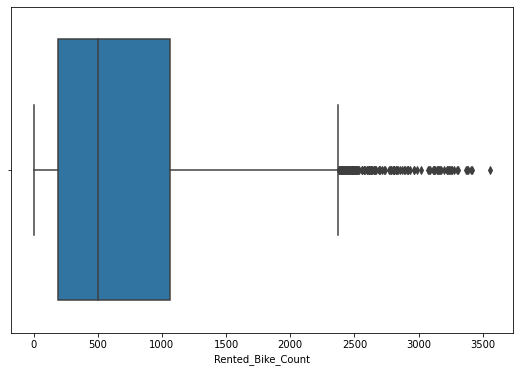

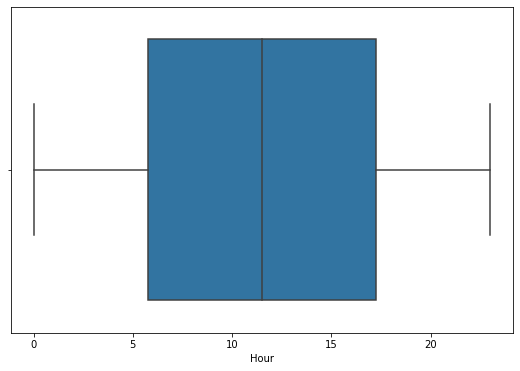

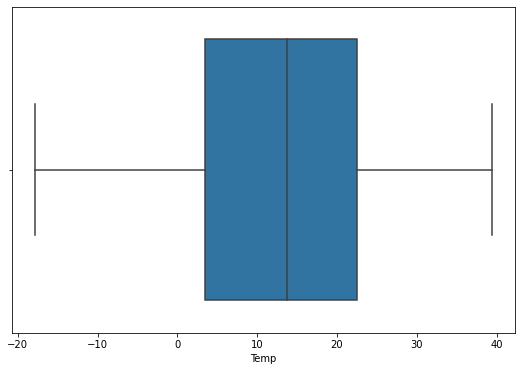

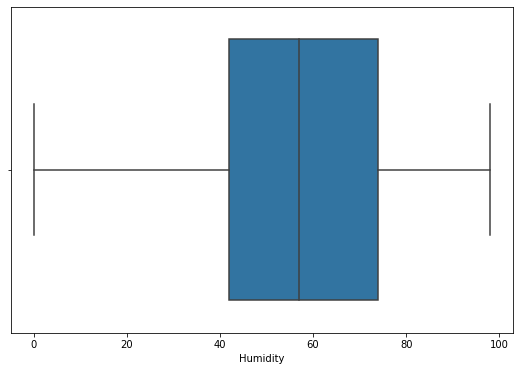

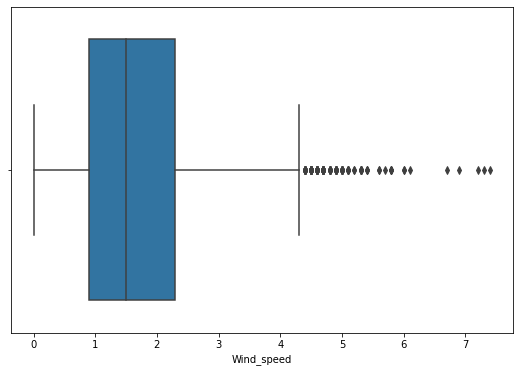

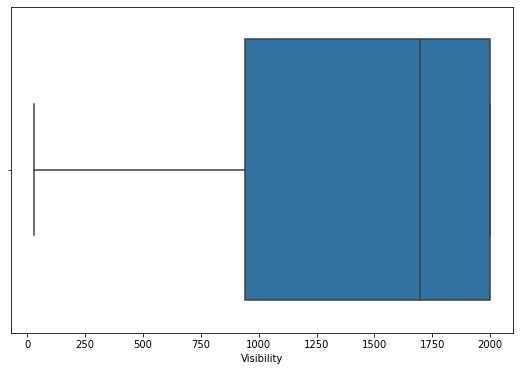

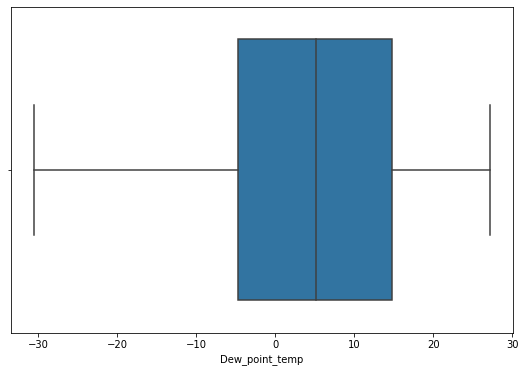

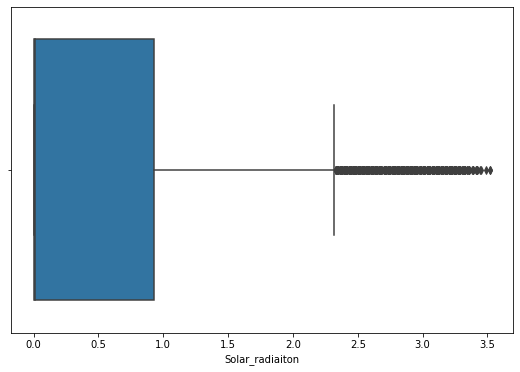

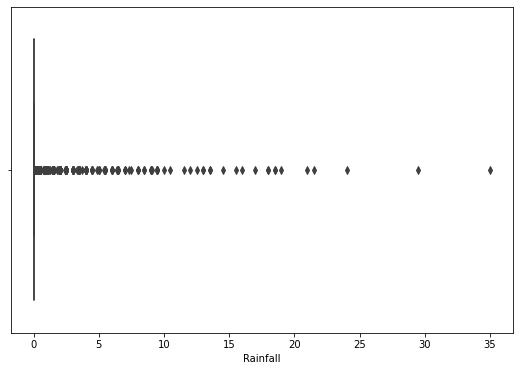

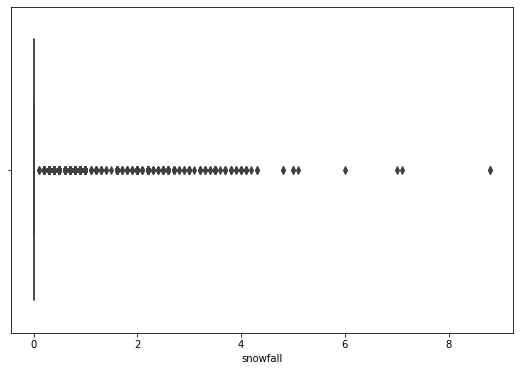

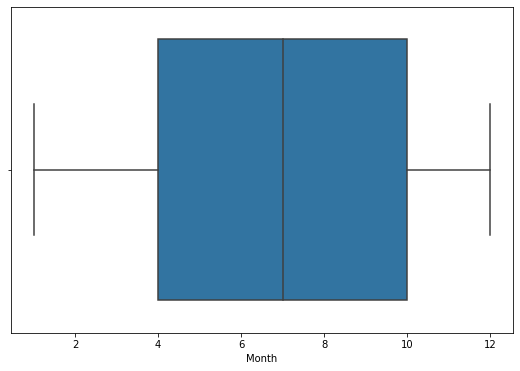

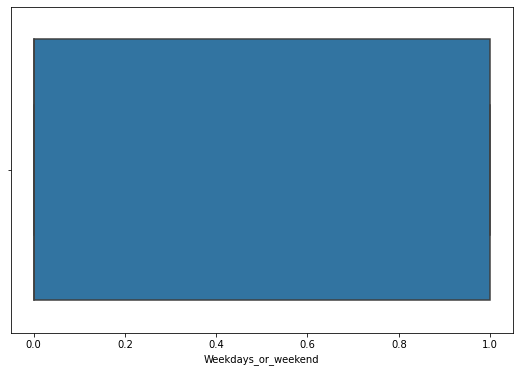

In [ ]:
# create numeric columns list.
numeric_col=df_bsdp.describe().columns.tolist()
numeric_col

# create categorical column list
categorical_columns= list(set(df_bsdp.columns) - set(df_bsdp.describe().columns))
categorical_columns

# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=df_bsdp[col])

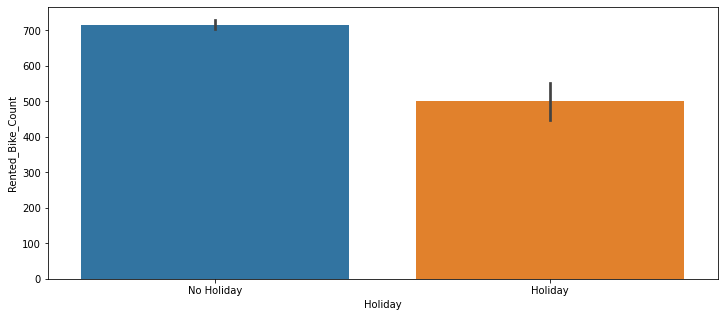

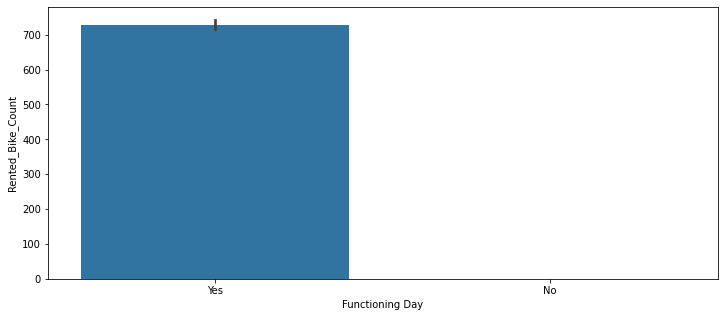

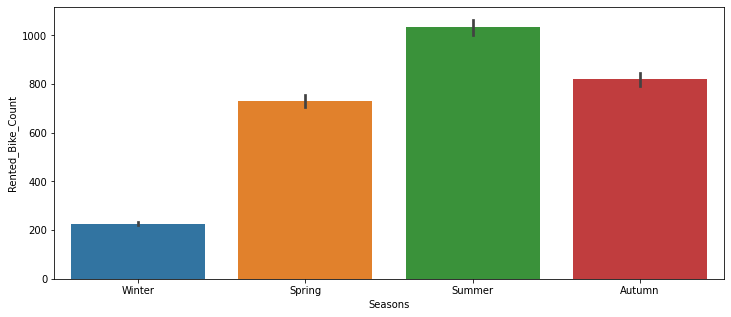

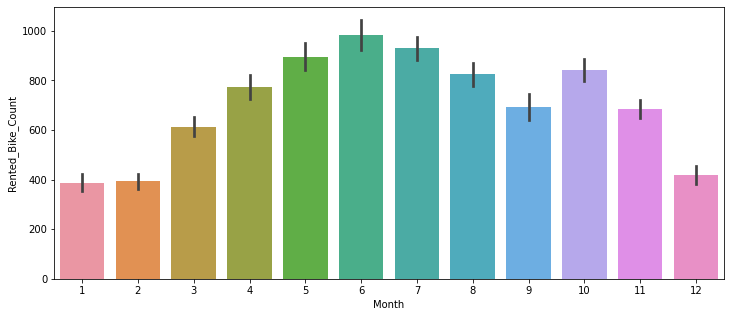

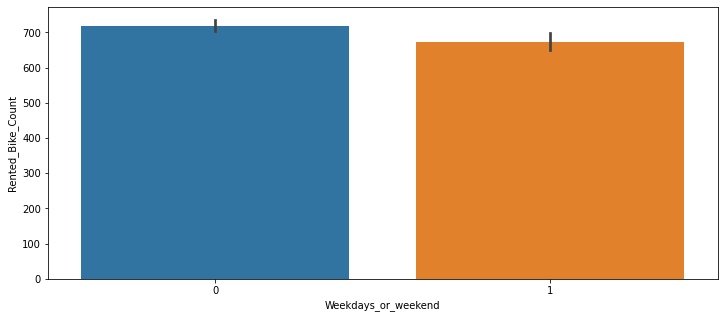

In [ ]:
# adding two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])

# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x=df_bsdp[col],y=df_bsdp['Rented_Bike_Count'])


Observations From Above Barcharts:

1) Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.

2) High number of bikes were rented on No Holidays.

3) Most of the bikes were rented on Weekdays compared to weekends.

4) From March Bike Rent Count started increasing and it was highest in June.

## Lets Check the relationship between dependent variable and independent variable. ##

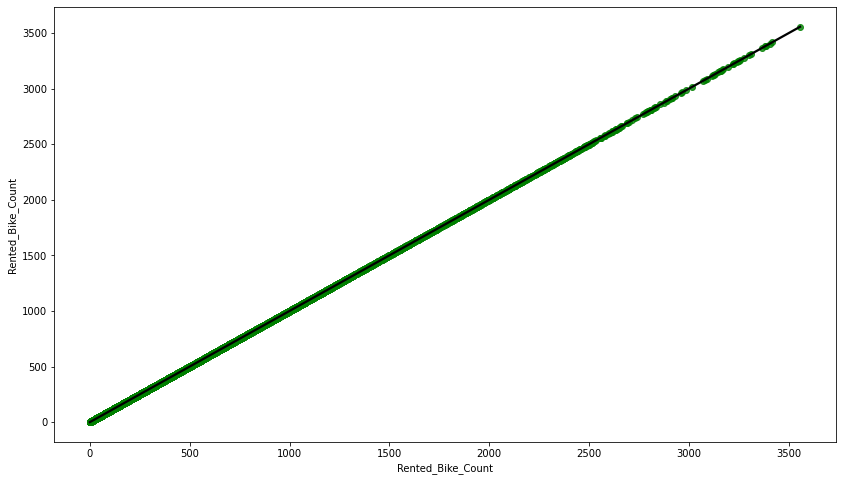

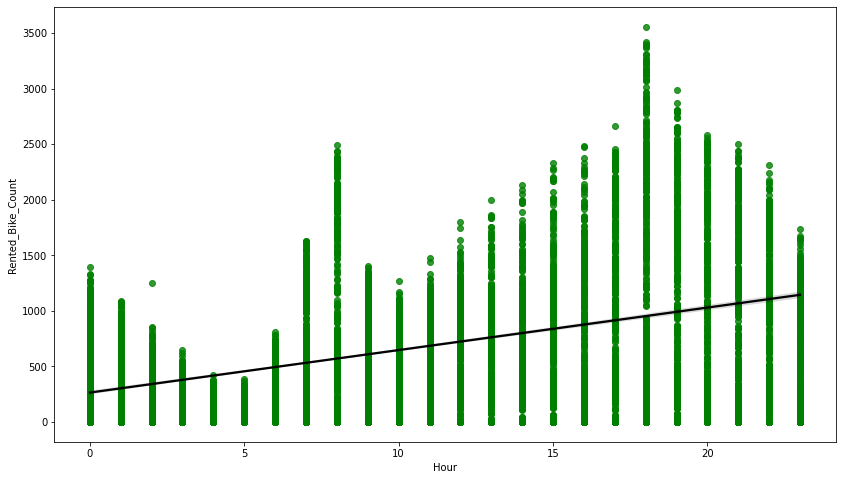

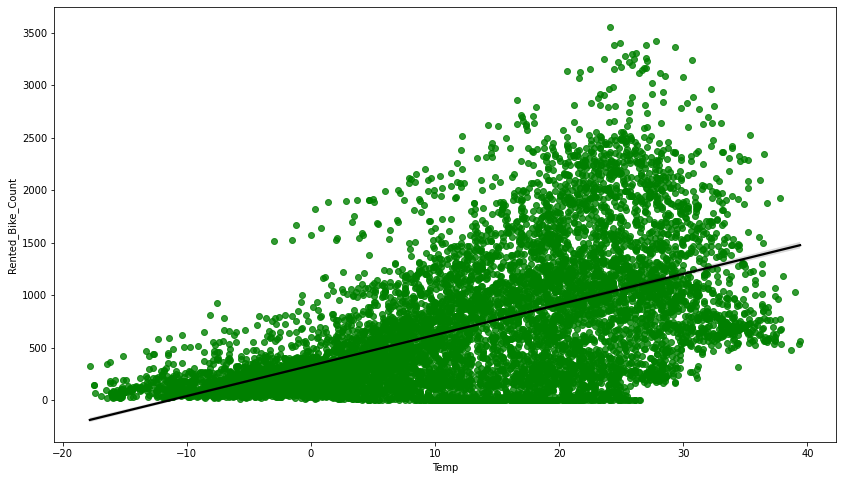

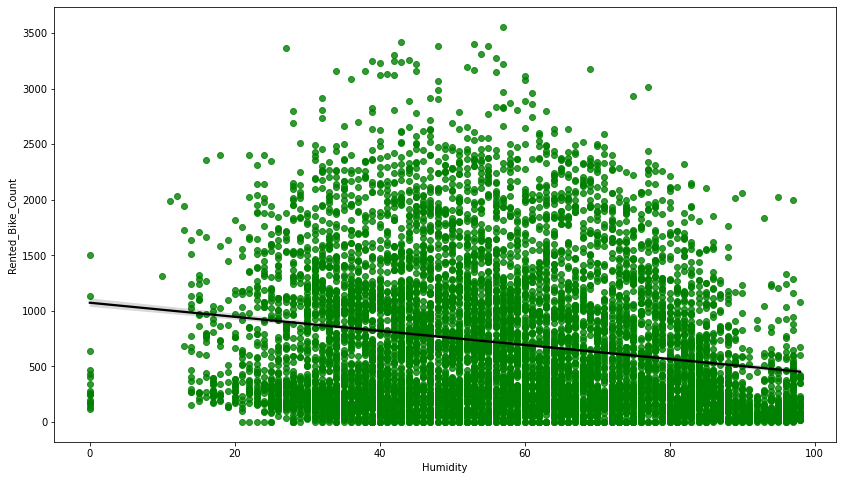

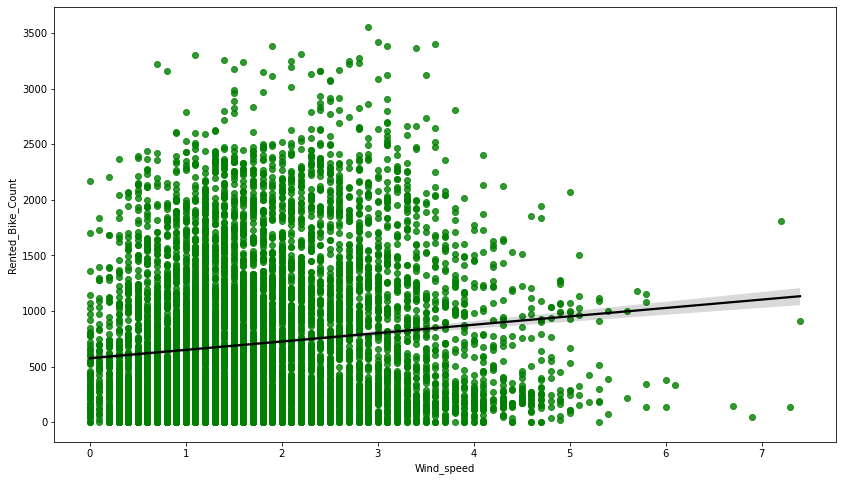

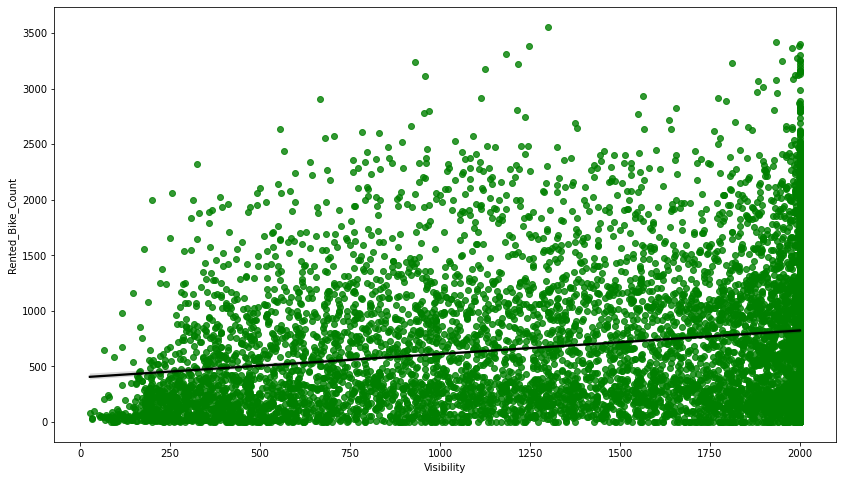

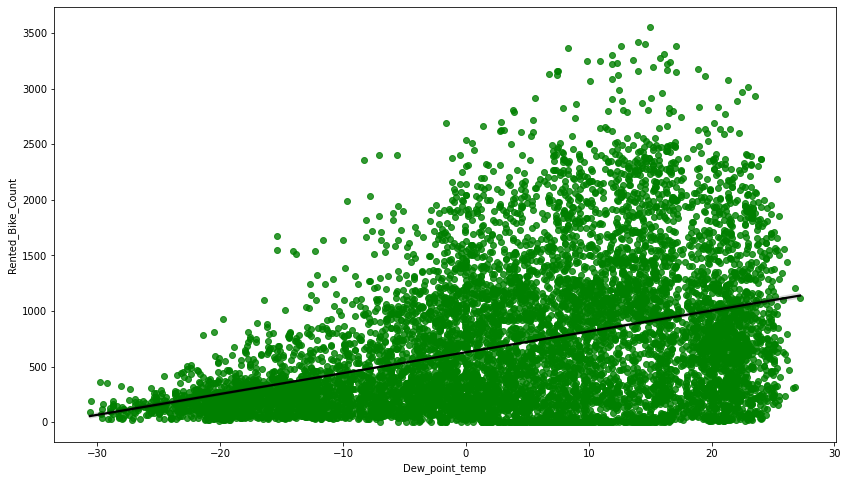

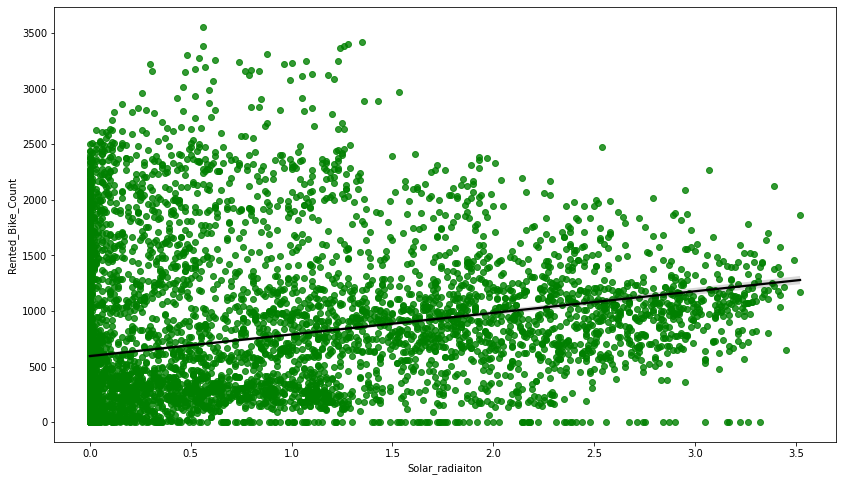

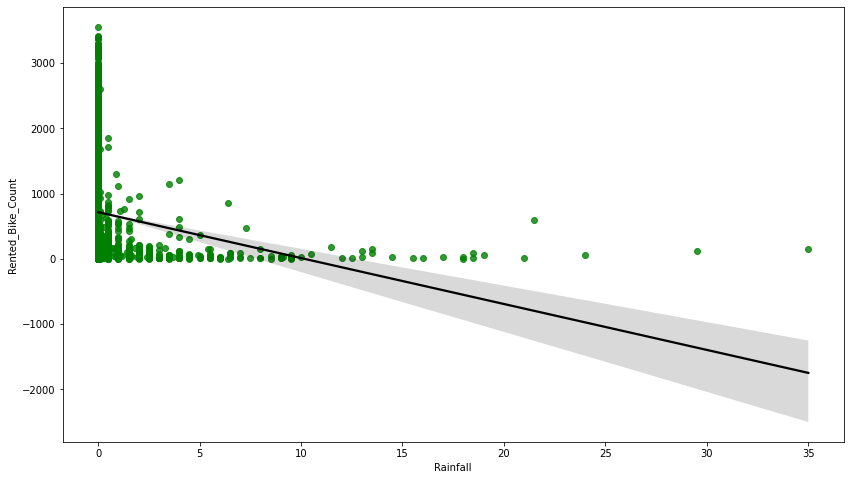

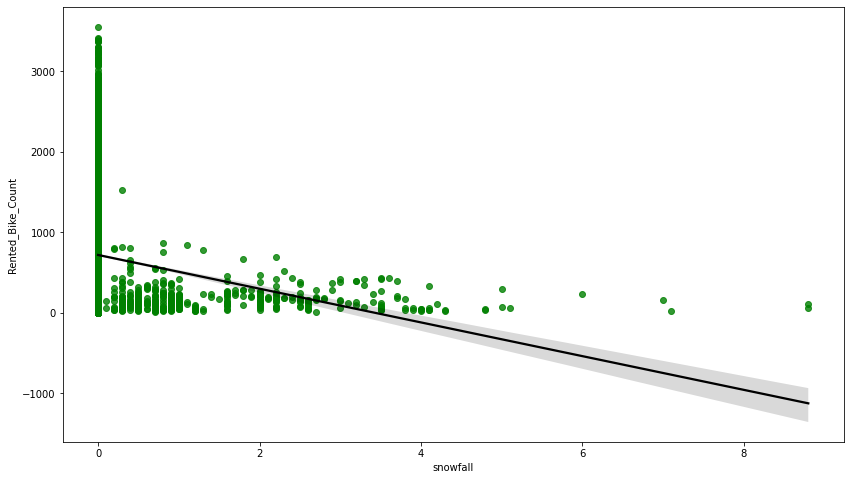

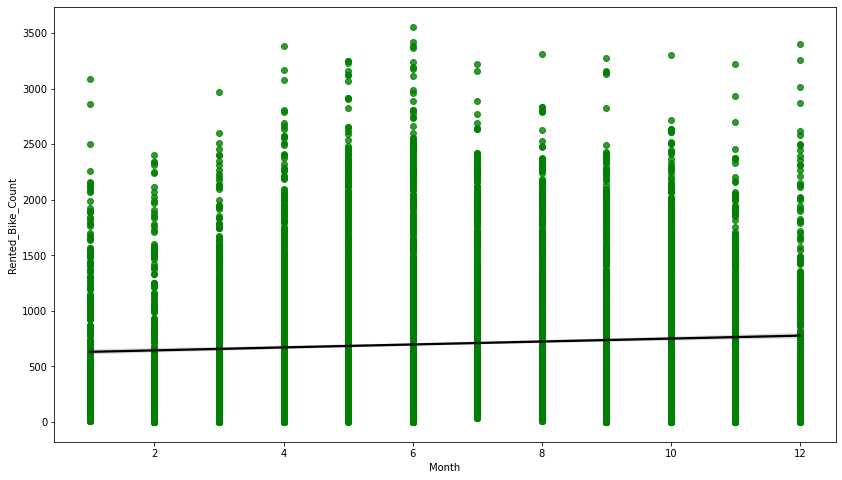

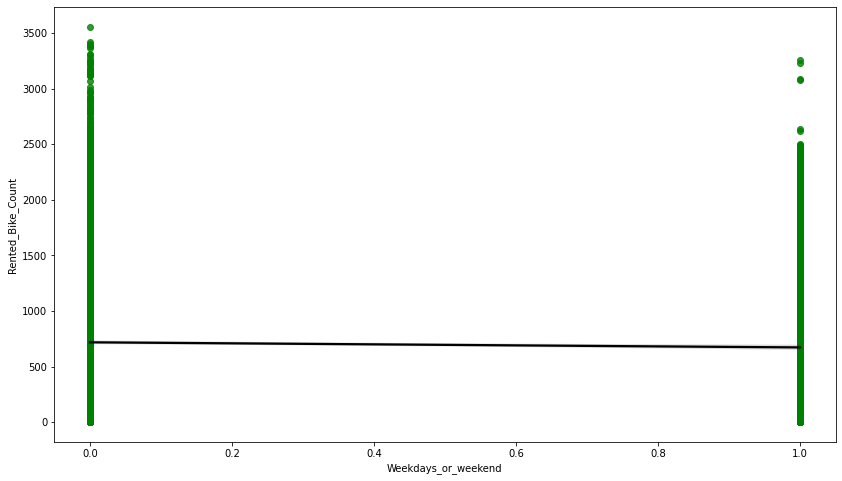

In [ ]:
for col in numeric_col:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=df_bsdp[col],y=df_bsdp['Rented_Bike_Count'],scatter_kws={'color':'green'},line_kws={'color':'black'})

Temperature:
1) For decrease in temperature below 0 deg celicus the bike rent count is significantly decreased because may be people dont want to ride bike in such cold temperature.
2) But for normal temperature the Bike rent count is very high.

humidity
1) Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

Wind Speed:
1) upto wind speed 4 m/s there is good bike rent count.

Visibility
1) It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

Dew Point Temperature
1)It's again the same case as of temperature. As dew temperature goes below 0 deg celcius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong colinarity.

Solar radiation
1)Here the amount of rented bikes is huge, when there is solar radiation.
Rainfall And snowfall
1) Its very obivious that people usually do not like ride bikes in rain and snowfall.


###Check corelation between dependent and independent variables ###

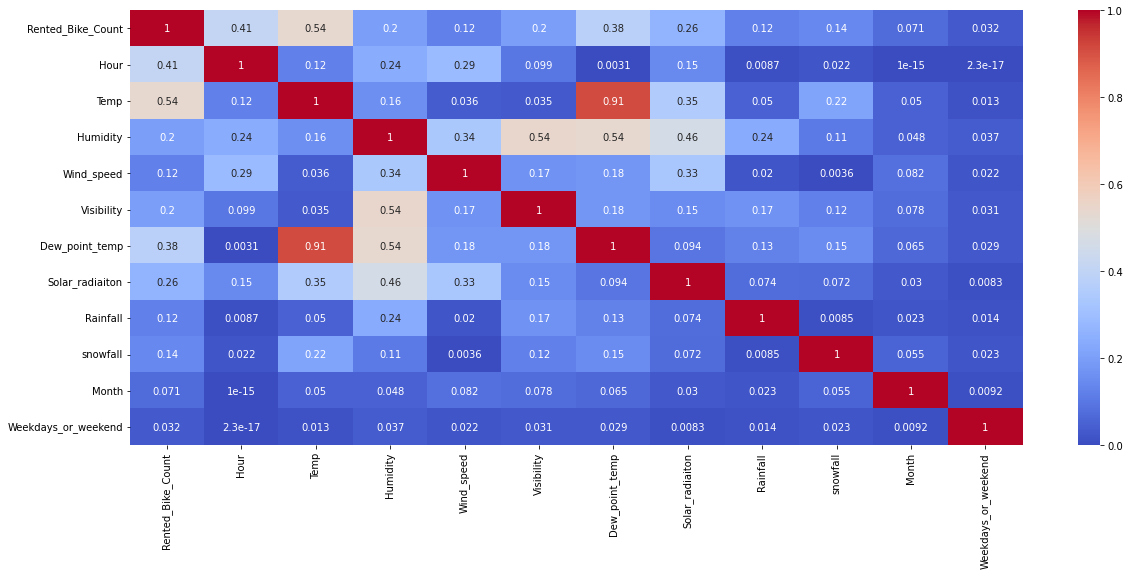

In [ ]:
plt.figure(figsize=(20,8))
corr=df_bsdp.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

In [ ]:
#check the null values in all the features

df_bsdp.isnull().sum()

Rented_Bike_Count      0
Hour                   0
Temp                   0
Humidity               0
Wind_speed             0
Visibility             0
Dew_point_temp         0
Solar_radiaiton        0
Rainfall               0
snowfall               0
Seasons                0
Holiday                0
Functioning Day        0
Month                  0
Weekdays_or_weekend    0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

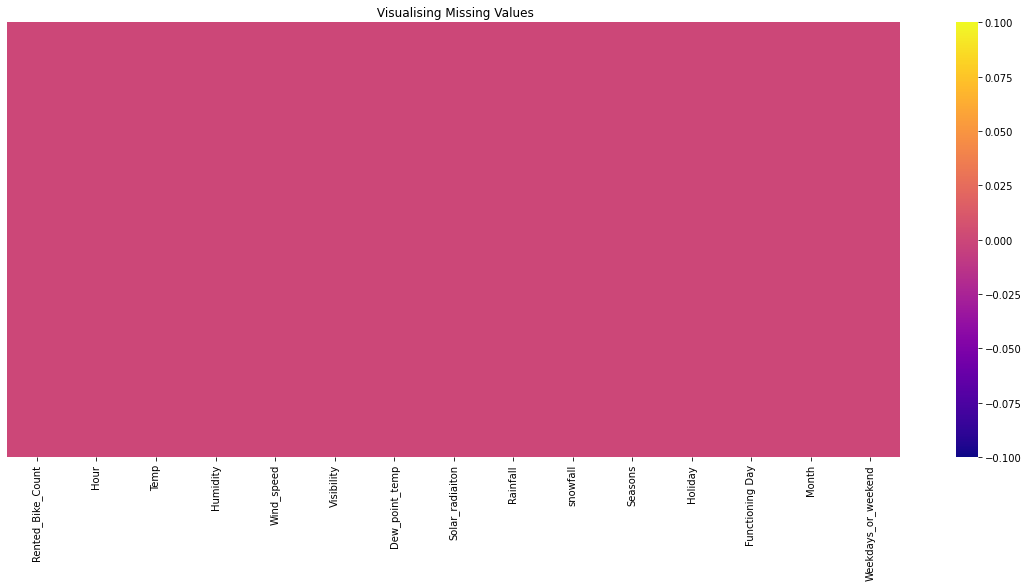

In [ ]:
# Visualization of missing values

plt.figure(figsize=(20,8))
sns.heatmap(df_bsdp.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

###Temperature and Dew point Temperature are highly correlated.

As per our linear regression assumption, there should not be colinearity between independent variables.

We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. so, We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.
And also we dropping "Date" column as its not useful for us(as we have created the month, weekdays and weekend columns 

In [ ]:
# dropping dew point temp from dataset

df_bsdp.drop('Dew_point_temp',inplace=True,axis=1)

In [ ]:
# checking multi collinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(df_bsdp[[i for i in df_bsdp.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,3.961874
1,Temp,3.236809
2,Humidity,6.114153
3,Wind_speed,4.616621
4,Visibility,5.404128
5,Solar_radiaiton,2.272068
6,Rainfall,1.081252
7,snowfall,1.125304
8,Month,4.580307
9,Weekdays_or_weekend,1.399708


# humidity  vif is greater than 5

In [ ]:
Calculate_vif(df_bsdp[[i for i in df_bsdp.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

,variables,VIF
0,Hour,3.931193
1,Temp,2.543847
2,Wind_speed,4.301342
3,Visibility,5.330632
4,Solar_radiaiton,1.894468
5,Rainfall,1.045135
6,snowfall,1.081123
7,Month,3.741610
8,Weekdays_or_weekend,1.375146


In [ ]:

Calculate_vif(df_bsdp[[i for i in df_bsdp.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

,variables,VIF
0,Hour,3.755736
1,Temp,2.492225
2,Wind_speed,3.748534
3,Solar_radiaiton,1.893823
4,Rainfall,1.030569
5,snowfall,1.077566
6,Month,3.049391
7,Weekdays_or_weekend,1.350943


In [ ]:
df_bsdp['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# Createing dummy variables

df_bsdp=pd.get_dummies(df_bsdp,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [ ]:
# As per above vif calculation dropping humidity and visibility columns.

df_bsdp.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [ ]:
# checking categoiries in holiday columns.

df_bsdp['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
## Labeling for holiday=1 and no holiday=0

df_bsdp['Holiday']=df_bsdp['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [ ]:
# Labeling for functioning day  Yes=1 and no No=0

df_bsdp['Functioning Day']=df_bsdp['Functioning Day'].map({'Yes':1, 'No':0})

In [ ]:
#final info of features before going to modelling

df_bsdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temp                 8760 non-null   float64
 3   Wind_speed           8760 non-null   float64
 4   Solar_radiaiton      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   snowfall             8760 non-null   float64
 7   Holiday              8760 non-null   int64  
 8   Functioning Day      8760 non-null   int64  
 9   Month                8760 non-null   int64  
 10  Weekdays_or_weekend  8760 non-null   int64  
 11  Seasons_Spring       8760 non-null   uint8  
 12  Seasons_Summer       8760 non-null   uint8  
 13  Seasons_Winter       8760 non-null   uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 778.6 KB


In [ ]:
# columns details
df_bsdp.columns

Index(['Rented_Bike_Count', 'Hour', 'Temp', 'Wind_speed', 'Solar_radiaiton',
       'Rainfall', 'snowfall', 'Holiday', 'Functioning Day', 'Month',
       'Weekdays_or_weekend', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

In [ ]:
# all independent columns are comes under x and all dependent variable 

X=df_bsdp.drop(['Rented_Bike_Count'],axis=1)

y=np.sqrt(df_bsdp['Rented_Bike_Count'])

In [ ]:
# split data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:

X_train[0:10]

,Hour,Temp,Wind_speed,Solar_radiaiton,Rainfall,snowfall,Holiday,Functioning Day,Month,Weekdays_or_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter
5316,12,24.1,0.8,0.72,0.0,0.0,0,1,10,1,0,1,0
5845,13,37.9,2.3,3.05,0.0,0.0,0,1,1,0,0,1,0
3586,10,17.5,1.8,2.26,0.0,0.0,0,1,4,1,1,0,0
3054,6,1.7,3.8,0.00,0.0,0.0,0,1,7,0,1,0,0
6805,13,27.1,1.7,2.56,0.0,0.0,0,1,10,0,0,0,0
5937,9,29.1,2.2,1.38,0.0,0.0,0,1,5,0,0,1,0
6257,17,29.9,2.9,0.86,0.0,0.0,0,1,8,1,0,1,0
5108,20,21.9,1.1,0.00,6.0,0.0,0,1,1,1,0,1,0
7855,7,7.8,0.6,0.00,0.0,0.0,0,1,10,0,0,0,0
6025,1,28.8,2.1,0.00,0.0,0.0,0,1,9,1,0,1,0


In [ ]:
# Transforming data
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.52173913, 0.73239437, 0.10810811, 0.20454545, 0.        ,
        0.        , 0.        , 1.        , 0.81818182, 1.        ,
        0.        , 1.        , 0.        ],
       [0.56521739, 0.97535211, 0.31081081, 0.86647727, 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.43478261, 0.61619718, 0.24324324, 0.64204545, 0.        ,
        0.        , 0.        , 1.        , 0.27272727, 1.        ,
        1.        , 0.        , 0.        ],
       [0.26086957, 0.33802817, 0.51351351, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.54545455, 0.        ,
        1.        , 0.        , 0.        ],
       [0.56521739, 0.78521127, 0.22972973, 0.72727273, 0.        ,
        0.        , 0.        , 1.        , 0.81818182, 0.        ,
        0.        , 0.        , 0.        ],
       [0.39130435, 0.82042254, 0.2972973 , 0.39204545, 0.        ,
        0.        , 0.     

In [ ]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-21.47705344024816

In [ ]:
regressor.coef_

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_train

5316    32.171416
5845    23.086793
3586    28.053520
3054    10.392305
6805    32.511536
          ...    
4373    17.492856
7891    44.362146
4859    32.649655
3264    20.024984
2732    22.649503
Name: Rented_Bike_Count, Length: 6132, dtype: float64

In [ ]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)

In [ ]:
#Predicted profit on the test data

y_pred

array([18.26653551, 25.60453927, 21.60814147, ..., 19.78143635,
       12.22523397, 26.58291432])

In [ ]:
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
2909     9.797959
2244    18.920888
5121    11.313708
322     13.747727
2731    22.825424
Name: Rented_Bike_Count, Length: 2628, dtype: float64

In [ ]:
mean_squared_error(y_test, y_pred)

58.624247223024895

In [ ]:
# Train performance

math.sqrt(mean_squared_error(y_train, y_pred_train))

7.765274813195316

In [ ]:
# test performance

math.sqrt(mean_squared_error(y_test, y_pred))

7.656647257319936

In [ ]:
# r2 score of train

r2_score(y_train, y_pred_train)

0.6123528085603556

In [ ]:
# r2 score of test 

r2_score(y_test, y_pred)

0.618326967365199